In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
import matplotlib.pyplot as plt
import numpy as np
from sklearn.externals import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import os
import glob
import scipy
import cv2 as cv

/home/uttam/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
our_own_dataset = []

# load the png image data
for image_file_name in glob.glob('nepali_characters/*/*/*.jpg'):
    # use the filename to set the correct label
    label = int(image_file_name[-14:-11])
    
    # load image data from png files into an array
    print ("loading ... ", image_file_name)
    img_array = cv.imread(image_file_name, 0)  #Read an image from a file as an array
    (thresh, image_array) = cv.threshold(img_array, 128, 255, cv.THRESH_BINARY | cv.THRESH_OTSU)
    # reshape from 28x28 to list of 784 values, invert values
 #   img_data  = (255.0 - img_array.reshape(784))/255.0
    
    # then scale data to range from 0.01 to 1.0
#     img_data = (img_data / 255.0 * 0.99) + 0.01
#     print(np.min(img_data))
#     print(np.max(img_data))
    
    # append label and image data  to test data set
    record = np.append(label,image_array)
    our_own_dataset.append(record)

loading ...  nepali_characters/02_vowels/013/004_09.jpg
loading ...  nepali_characters/02_vowels/013/016_04.jpg
loading ...  nepali_characters/02_vowels/013/023_01.jpg
loading ...  nepali_characters/02_vowels/013/045_02.jpg
loading ...  nepali_characters/02_vowels/013/044_02.jpg
loading ...  nepali_characters/02_vowels/013/019_02.jpg
loading ...  nepali_characters/02_vowels/013/004_10.jpg
loading ...  nepali_characters/02_vowels/013/030_02.jpg
loading ...  nepali_characters/02_vowels/013/013_03.jpg
loading ...  nepali_characters/02_vowels/013/029_01.jpg
loading ...  nepali_characters/02_vowels/013/001_22.jpg
loading ...  nepali_characters/02_vowels/013/001_03.jpg
loading ...  nepali_characters/02_vowels/013/017_02.jpg
loading ...  nepali_characters/02_vowels/013/018_02.jpg
loading ...  nepali_characters/02_vowels/013/008_03.jpg
loading ...  nepali_characters/02_vowels/013/013_06.jpg
loading ...  nepali_characters/02_vowels/013/019_06.jpg
loading ...  nepali_characters/02_vowels/013/019

loading ...  nepali_characters/02_vowels/019/037_01.jpg
loading ...  nepali_characters/02_vowels/019/020_10.jpg
loading ...  nepali_characters/02_vowels/019/027_01.jpg
loading ...  nepali_characters/02_vowels/019/018_05.jpg
loading ...  nepali_characters/02_vowels/019/022_02.jpg
loading ...  nepali_characters/02_vowels/019/012_11.jpg
loading ...  nepali_characters/02_vowels/019/006_04.jpg
loading ...  nepali_characters/02_vowels/019/019_04.jpg
loading ...  nepali_characters/02_vowels/019/016_05.jpg
loading ...  nepali_characters/02_vowels/019/030_03.jpg
loading ...  nepali_characters/02_vowels/019/001_06.jpg
loading ...  nepali_characters/02_vowels/019/017_07.jpg
loading ...  nepali_characters/02_vowels/019/010_02.jpg
loading ...  nepali_characters/02_vowels/019/005_03.jpg
loading ...  nepali_characters/02_vowels/019/012_08.jpg
loading ...  nepali_characters/02_vowels/019/020_07.jpg
loading ...  nepali_characters/02_vowels/019/001_09.jpg
loading ...  nepali_characters/02_vowels/019/044

loading ...  nepali_characters/02_vowels/010/008_04.jpg
loading ...  nepali_characters/02_vowels/010/005_05.jpg
loading ...  nepali_characters/02_vowels/010/006_02.jpg
loading ...  nepali_characters/02_vowels/010/011_05.jpg
loading ...  nepali_characters/02_vowels/010/040_02.jpg
loading ...  nepali_characters/02_vowels/010/038_02.jpg
loading ...  nepali_characters/02_vowels/010/001_10.jpg
loading ...  nepali_characters/02_vowels/010/001_04.jpg
loading ...  nepali_characters/02_vowels/010/015_04.jpg
loading ...  nepali_characters/02_vowels/010/005_04.jpg
loading ...  nepali_characters/02_vowels/010/017_04.jpg
loading ...  nepali_characters/02_vowels/010/023_02.jpg
loading ...  nepali_characters/02_vowels/010/007_08.jpg
loading ...  nepali_characters/02_vowels/010/005_01.jpg
loading ...  nepali_characters/02_vowels/010/001_18.jpg
loading ...  nepali_characters/02_vowels/010/020_04.jpg
loading ...  nepali_characters/02_vowels/010/010_01.jpg
loading ...  nepali_characters/02_vowels/010/001

loading ...  nepali_characters/02_vowels/017/019_07.jpg
loading ...  nepali_characters/02_vowels/017/020_01.jpg
loading ...  nepali_characters/02_vowels/017/011_04.jpg
loading ...  nepali_characters/02_vowels/017/015_03.jpg
loading ...  nepali_characters/02_vowels/017/004_05.jpg
loading ...  nepali_characters/02_vowels/017/018_04.jpg
loading ...  nepali_characters/02_vowels/017/037_02.jpg
loading ...  nepali_characters/02_vowels/017/006_03.jpg
loading ...  nepali_characters/02_vowels/017/028_01.jpg
loading ...  nepali_characters/02_vowels/017/020_08.jpg
loading ...  nepali_characters/02_vowels/017/020_06.jpg
loading ...  nepali_characters/02_vowels/017/012_03.jpg
loading ...  nepali_characters/02_vowels/017/018_09.jpg
loading ...  nepali_characters/02_vowels/017/011_07.jpg
loading ...  nepali_characters/02_vowels/017/007_03.jpg
loading ...  nepali_characters/02_vowels/017/004_04.jpg
loading ...  nepali_characters/02_vowels/017/018_10.jpg
loading ...  nepali_characters/02_vowels/017/008

loading ...  nepali_characters/01_numerals/005/010_08.jpg
loading ...  nepali_characters/01_numerals/005/021_06.jpg
loading ...  nepali_characters/01_numerals/005/012_04.jpg
loading ...  nepali_characters/01_numerals/005/017_06.jpg
loading ...  nepali_characters/01_numerals/005/016_09.jpg
loading ...  nepali_characters/01_numerals/005/015_05.jpg
loading ...  nepali_characters/01_numerals/005/012_01.jpg
loading ...  nepali_characters/01_numerals/005/002_02.jpg
loading ...  nepali_characters/01_numerals/005/008_08.jpg
loading ...  nepali_characters/01_numerals/005/011_09.jpg
loading ...  nepali_characters/01_numerals/005/042_01.jpg
loading ...  nepali_characters/01_numerals/005/024_01.jpg
loading ...  nepali_characters/01_numerals/005/030_01.jpg
loading ...  nepali_characters/01_numerals/005/012_12.jpg
loading ...  nepali_characters/01_numerals/005/032_01.jpg
loading ...  nepali_characters/01_numerals/005/015_09.jpg
loading ...  nepali_characters/01_numerals/005/017_03.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/009/030_01.jpg
loading ...  nepali_characters/01_numerals/009/012_12.jpg
loading ...  nepali_characters/01_numerals/009/032_01.jpg
loading ...  nepali_characters/01_numerals/009/015_09.jpg
loading ...  nepali_characters/01_numerals/009/017_03.jpg
loading ...  nepali_characters/01_numerals/009/002_05.jpg
loading ...  nepali_characters/01_numerals/009/038_01.jpg
loading ...  nepali_characters/01_numerals/009/005_14.jpg
loading ...  nepali_characters/01_numerals/009/008_04.jpg
loading ...  nepali_characters/01_numerals/009/005_05.jpg
loading ...  nepali_characters/01_numerals/009/030_04.jpg
loading ...  nepali_characters/01_numerals/009/006_02.jpg
loading ...  nepali_characters/01_numerals/009/011_05.jpg
loading ...  nepali_characters/01_numerals/009/006_09.jpg
loading ...  nepali_characters/01_numerals/009/016_10.jpg
loading ...  nepali_characters/01_numerals/009/040_02.jpg
loading ...  nepali_characters/01_numerals/009/038_02.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/006/034_02.jpg
loading ...  nepali_characters/01_numerals/006/019_07.jpg
loading ...  nepali_characters/01_numerals/006/020_01.jpg
loading ...  nepali_characters/01_numerals/006/011_04.jpg
loading ...  nepali_characters/01_numerals/006/015_03.jpg
loading ...  nepali_characters/01_numerals/006/021_05.jpg
loading ...  nepali_characters/01_numerals/006/022_06.jpg
loading ...  nepali_characters/01_numerals/006/004_05.jpg
loading ...  nepali_characters/01_numerals/006/018_04.jpg
loading ...  nepali_characters/01_numerals/006/037_02.jpg
loading ...  nepali_characters/01_numerals/006/006_10.jpg
loading ...  nepali_characters/01_numerals/006/006_03.jpg
loading ...  nepali_characters/01_numerals/006/028_01.jpg
loading ...  nepali_characters/01_numerals/006/020_08.jpg
loading ...  nepali_characters/01_numerals/006/020_06.jpg
loading ...  nepali_characters/01_numerals/006/012_03.jpg
loading ...  nepali_characters/01_numerals/006/018_09.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/001/043_01.jpg
loading ...  nepali_characters/01_numerals/001/012_07.jpg
loading ...  nepali_characters/01_numerals/001/002_04.jpg
loading ...  nepali_characters/01_numerals/001/001_13.jpg
loading ...  nepali_characters/01_numerals/001/018_06.jpg
loading ...  nepali_characters/01_numerals/001/002_03.jpg
loading ...  nepali_characters/01_numerals/001/008_05.jpg
loading ...  nepali_characters/01_numerals/001/006_06.jpg
loading ...  nepali_characters/01_numerals/001/007_01.jpg
loading ...  nepali_characters/01_numerals/001/027_03.jpg
loading ...  nepali_characters/01_numerals/001/028_02.jpg
loading ...  nepali_characters/01_numerals/001/002_13.jpg
loading ...  nepali_characters/01_numerals/001/004_02.jpg
loading ...  nepali_characters/01_numerals/001/002_01.jpg
loading ...  nepali_characters/01_numerals/001/010_10.jpg
loading ...  nepali_characters/01_numerals/001/007_02.jpg
loading ...  nepali_characters/01_numerals/001/012_02.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/002/005_07.jpg
loading ...  nepali_characters/01_numerals/002/011_01.jpg
loading ...  nepali_characters/01_numerals/002/036_01.jpg
loading ...  nepali_characters/01_numerals/002/011_03.jpg
loading ...  nepali_characters/01_numerals/002/001_07.jpg
loading ...  nepali_characters/01_numerals/002/022_03.jpg
loading ...  nepali_characters/01_numerals/002/013_07.jpg
loading ...  nepali_characters/01_numerals/002/014_02.jpg
loading ...  nepali_characters/01_numerals/002/042_02.jpg
loading ...  nepali_characters/01_numerals/002/008_09.jpg
loading ...  nepali_characters/01_numerals/002/014_06.jpg
loading ...  nepali_characters/01_numerals/002/039_01.jpg
loading ...  nepali_characters/01_numerals/002/010_07.jpg
loading ...  nepali_characters/01_numerals/002/004_08.jpg
loading ...  nepali_characters/01_numerals/002/015_08.jpg
loading ...  nepali_characters/01_numerals/002/025_01.jpg
loading ...  nepali_characters/01_numerals/002/021_09.jpg
loading ...  n

loading ...  nepali_characters/01_numerals/003/039_01.jpg
loading ...  nepali_characters/01_numerals/003/010_07.jpg
loading ...  nepali_characters/01_numerals/003/004_08.jpg
loading ...  nepali_characters/01_numerals/003/015_08.jpg
loading ...  nepali_characters/01_numerals/003/025_01.jpg
loading ...  nepali_characters/01_numerals/003/021_09.jpg
loading ...  nepali_characters/01_numerals/003/024_02.jpg
loading ...  nepali_characters/01_numerals/003/040_01.jpg
loading ...  nepali_characters/01_numerals/003/035_01.jpg
loading ...  nepali_characters/01_numerals/003/022_07.jpg
loading ...  nepali_characters/01_numerals/003/001_12.jpg
loading ...  nepali_characters/01_numerals/003/018_03.jpg
loading ...  nepali_characters/01_numerals/003/013_04.jpg
loading ...  nepali_characters/01_numerals/003/041_01.jpg
loading ...  nepali_characters/01_numerals/003/001_24.jpg
loading ...  nepali_characters/01_numerals/003/014_03.jpg
loading ...  nepali_characters/01_numerals/003/014_07.jpg
loading ...  n

loading ...  nepali_characters/03_consonants/025/011_07.jpg
loading ...  nepali_characters/03_consonants/025/007_03.jpg
loading ...  nepali_characters/03_consonants/025/004_04.jpg
loading ...  nepali_characters/03_consonants/025/018_10.jpg
loading ...  nepali_characters/03_consonants/025/002_06.jpg
loading ...  nepali_characters/03_consonants/025/010_08.jpg
loading ...  nepali_characters/03_consonants/025/012_04.jpg
loading ...  nepali_characters/03_consonants/025/017_06.jpg
loading ...  nepali_characters/03_consonants/025/015_05.jpg
loading ...  nepali_characters/03_consonants/025/012_01.jpg
loading ...  nepali_characters/03_consonants/025/002_02.jpg
loading ...  nepali_characters/03_consonants/025/011_09.jpg
loading ...  nepali_characters/03_consonants/025/042_01.jpg
loading ...  nepali_characters/03_consonants/025/024_01.jpg
loading ...  nepali_characters/03_consonants/025/030_01.jpg
loading ...  nepali_characters/03_consonants/025/032_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/041/013_01.jpg
loading ...  nepali_characters/03_consonants/041/010_06.jpg
loading ...  nepali_characters/03_consonants/041/001_17.jpg
loading ...  nepali_characters/03_consonants/041/011_02.jpg
loading ...  nepali_characters/03_consonants/041/004_03.jpg
loading ...  nepali_characters/03_consonants/041/017_05.jpg
loading ...  nepali_characters/03_consonants/041/013_08.jpg
loading ...  nepali_characters/03_consonants/041/033_01.jpg
loading ...  nepali_characters/03_consonants/041/020_05.jpg
loading ...  nepali_characters/03_consonants/041/002_12.jpg
loading ...  nepali_characters/03_consonants/041/027_02.jpg
loading ...  nepali_characters/03_consonants/041/010_03.jpg
loading ...  nepali_characters/03_consonants/041/001_14.jpg
loading ...  nepali_characters/03_consonants/041/004_01.jpg
loading ...  nepali_characters/03_consonants/041/002_08.jpg
loading ...  nepali_characters/03_consonants/041/006_05.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/031/008_02.jpg
loading ...  nepali_characters/03_consonants/031/015_06.jpg
loading ...  nepali_characters/03_consonants/031/047_02.jpg
loading ...  nepali_characters/03_consonants/031/014_04.jpg
loading ...  nepali_characters/03_consonants/031/013_02.jpg
loading ...  nepali_characters/03_consonants/031/015_01.jpg
loading ...  nepali_characters/03_consonants/031/016_03.jpg
loading ...  nepali_characters/03_consonants/031/015_07.jpg
loading ...  nepali_characters/03_consonants/031/015_10.jpg
loading ...  nepali_characters/03_consonants/031/020_02.jpg
loading ...  nepali_characters/03_consonants/031/017_01.jpg
loading ...  nepali_characters/03_consonants/031/015_02.jpg
loading ...  nepali_characters/03_consonants/031/020_09.jpg
loading ...  nepali_characters/03_consonants/031/005_02.jpg
loading ...  nepali_characters/03_consonants/031/012_05.jpg
loading ...  nepali_characters/03_consonants/031/018_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/046/002_11.jpg
loading ...  nepali_characters/03_consonants/046/005_03.jpg
loading ...  nepali_characters/03_consonants/046/020_07.jpg
loading ...  nepali_characters/03_consonants/046/001_09.jpg
loading ...  nepali_characters/03_consonants/046/044_01.jpg
loading ...  nepali_characters/03_consonants/046/041_02.jpg
loading ...  nepali_characters/03_consonants/046/014_01.jpg
loading ...  nepali_characters/03_consonants/046/035_02.jpg
loading ...  nepali_characters/03_consonants/046/033_02.jpg
loading ...  nepali_characters/03_consonants/046/034_02.jpg
loading ...  nepali_characters/03_consonants/046/020_01.jpg
loading ...  nepali_characters/03_consonants/046/011_04.jpg
loading ...  nepali_characters/03_consonants/046/015_03.jpg
loading ...  nepali_characters/03_consonants/046/004_05.jpg
loading ...  nepali_characters/03_consonants/046/018_04.jpg
loading ...  nepali_characters/03_consonants/046/037_02.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/049/041_01.jpg
loading ...  nepali_characters/03_consonants/049/047_07.jpg
loading ...  nepali_characters/03_consonants/049/014_03.jpg
loading ...  nepali_characters/03_consonants/049/014_07.jpg
loading ...  nepali_characters/03_consonants/049/047_03.jpg
loading ...  nepali_characters/03_consonants/049/045_01.jpg
loading ...  nepali_characters/03_consonants/049/001_01.jpg
loading ...  nepali_characters/03_consonants/049/043_01.jpg
loading ...  nepali_characters/03_consonants/049/002_04.jpg
loading ...  nepali_characters/03_consonants/049/001_13.jpg
loading ...  nepali_characters/03_consonants/049/018_06.jpg
loading ...  nepali_characters/03_consonants/049/002_03.jpg
loading ...  nepali_characters/03_consonants/049/008_05.jpg
loading ...  nepali_characters/03_consonants/049/007_01.jpg
loading ...  nepali_characters/03_consonants/049/028_02.jpg
loading ...  nepali_characters/03_consonants/049/002_13.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/024/007_04.jpg
loading ...  nepali_characters/03_consonants/024/017_08.jpg
loading ...  nepali_characters/03_consonants/024/008_01.jpg
loading ...  nepali_characters/03_consonants/024/011_06.jpg
loading ...  nepali_characters/03_consonants/024/013_05.jpg
loading ...  nepali_characters/03_consonants/024/014_10.jpg
loading ...  nepali_characters/03_consonants/024/004_11.jpg
loading ...  nepali_characters/03_consonants/024/012_06.jpg
loading ...  nepali_characters/03_consonants/024/004_07.jpg
loading ...  nepali_characters/03_consonants/024/004_06.jpg
loading ...  nepali_characters/03_consonants/024/008_02.jpg
loading ...  nepali_characters/03_consonants/024/015_06.jpg
loading ...  nepali_characters/03_consonants/024/047_02.jpg
loading ...  nepali_characters/03_consonants/024/014_04.jpg
loading ...  nepali_characters/03_consonants/024/013_02.jpg
loading ...  nepali_characters/03_consonants/024/015_01.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/030/010_09.jpg
loading ...  nepali_characters/03_consonants/030/013_01.jpg
loading ...  nepali_characters/03_consonants/030/010_06.jpg
loading ...  nepali_characters/03_consonants/030/001_17.jpg
loading ...  nepali_characters/03_consonants/030/011_02.jpg
loading ...  nepali_characters/03_consonants/030/004_03.jpg
loading ...  nepali_characters/03_consonants/030/017_05.jpg
loading ...  nepali_characters/03_consonants/030/013_08.jpg
loading ...  nepali_characters/03_consonants/030/033_01.jpg
loading ...  nepali_characters/03_consonants/030/020_05.jpg
loading ...  nepali_characters/03_consonants/030/002_12.jpg
loading ...  nepali_characters/03_consonants/030/027_02.jpg
loading ...  nepali_characters/03_consonants/030/010_03.jpg
loading ...  nepali_characters/03_consonants/030/001_14.jpg
loading ...  nepali_characters/03_consonants/030/004_01.jpg
loading ...  nepali_characters/03_consonants/030/002_08.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/048/004_02.jpg
loading ...  nepali_characters/03_consonants/048/002_01.jpg
loading ...  nepali_characters/03_consonants/048/010_10.jpg
loading ...  nepali_characters/03_consonants/048/007_02.jpg
loading ...  nepali_characters/03_consonants/048/047_01.jpg
loading ...  nepali_characters/03_consonants/048/012_02.jpg
loading ...  nepali_characters/03_consonants/048/014_08.jpg
loading ...  nepali_characters/03_consonants/048/043_02.jpg
loading ...  nepali_characters/03_consonants/048/019_01.jpg
loading ...  nepali_characters/03_consonants/048/014_09.jpg
loading ...  nepali_characters/03_consonants/048/032_02.jpg
loading ...  nepali_characters/03_consonants/048/007_04.jpg
loading ...  nepali_characters/03_consonants/048/017_08.jpg
loading ...  nepali_characters/03_consonants/048/008_01.jpg
loading ...  nepali_characters/03_consonants/048/011_06.jpg
loading ...  nepali_characters/03_consonants/048/013_05.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/044/039_01.jpg
loading ...  nepali_characters/03_consonants/044/010_07.jpg
loading ...  nepali_characters/03_consonants/044/004_08.jpg
loading ...  nepali_characters/03_consonants/044/047_05.jpg
loading ...  nepali_characters/03_consonants/044/015_08.jpg
loading ...  nepali_characters/03_consonants/044/025_01.jpg
loading ...  nepali_characters/03_consonants/044/024_02.jpg
loading ...  nepali_characters/03_consonants/044/040_01.jpg
loading ...  nepali_characters/03_consonants/044/035_01.jpg
loading ...  nepali_characters/03_consonants/044/001_12.jpg
loading ...  nepali_characters/03_consonants/044/018_03.jpg
loading ...  nepali_characters/03_consonants/044/013_04.jpg
loading ...  nepali_characters/03_consonants/044/041_01.jpg
loading ...  nepali_characters/03_consonants/044/047_07.jpg
loading ...  nepali_characters/03_consonants/044/014_03.jpg
loading ...  nepali_characters/03_consonants/044/014_07.jpg
loading ...  nepali_characters/03_conson

loading ...  nepali_characters/03_consonants/035/007_02.jpg
loading ...  nepali_characters/03_consonants/035/047_01.jpg
loading ...  nepali_characters/03_consonants/035/012_02.jpg
loading ...  nepali_characters/03_consonants/035/014_08.jpg
loading ...  nepali_characters/03_consonants/035/043_02.jpg
loading ...  nepali_characters/03_consonants/035/019_01.jpg
loading ...  nepali_characters/03_consonants/035/014_09.jpg
loading ...  nepali_characters/03_consonants/035/032_02.jpg
loading ...  nepali_characters/03_consonants/035/007_04.jpg
loading ...  nepali_characters/03_consonants/035/017_08.jpg
loading ...  nepali_characters/03_consonants/035/008_01.jpg
loading ...  nepali_characters/03_consonants/035/011_06.jpg
loading ...  nepali_characters/03_consonants/035/013_05.jpg
loading ...  nepali_characters/03_consonants/035/014_10.jpg
loading ...  nepali_characters/03_consonants/035/004_11.jpg
loading ...  nepali_characters/03_consonants/035/012_06.jpg
loading ...  nepali_characters/03_conson

In [3]:
data = np.array(our_own_dataset)
np.random.shuffle(data)
xx = pd.DataFrame(data)

In [4]:
xx.tail()

,0,1,2,3,4,5,6,7,8,9,...,1287,1288,1289,1290,1291,1292,1293,1294,1295,1296
12907,56,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12908,18,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12909,13,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12910,24,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255
12911,5,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,255


In [5]:
x = np.array(xx)
X = x[:,1:]
y = x[:,0]

In [6]:
x.shape

(12912, 1297)

In [7]:
# X = data_pd.iloc[:,1:]
# y = data_pd.iloc[:,0:1].values
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2)

In [8]:
X_test.shape

(2583, 1296)

In [10]:
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

# building the input vector from the 28x28 pixels
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

X_train shape (10329, 1296)
y_train shape (10329,)
X_test shape (2583, 1296)
y_test shape (2583,)
Train matrix shape (10329, 1296)
Test matrix shape (2583, 1296)


In [11]:
# one-hot encoding using keras' numpy-related utilities
n_classes = 58
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = keras.utils.to_categorical(y_train, n_classes)
Y_test = keras.utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

Shape before one-hot encoding:  (10329,)
Shape after one-hot encoding:  (10329, 58)


In [12]:
# img_shape = (28,28,1)
# model = Sequential()
# model.add(Conv2D(32, (3, 3), input_shape=img_shape))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(32, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# BatchNormalization(axis=-1)
# model.add(Conv2D(64,(3, 3)))
# model.add(Activation('relu'))
# BatchNormalization(axis=-1)
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Flatten())
# # Fully connected layer

# BatchNormalization()
# model.add(Dense(512))
# model.add(Activation('relu'))
# BatchNormalization()
# model.add(Dropout(0.2))
# model.add(Dense(58))

# model.add(Activation('softmax'))

model = Sequential()
model.add(Dense(256, input_shape=(1296,)))
model.add(Activation('relu'))                            
model.add(Dropout(0.2))

model.add(Dense(192))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(Dense(58))
model.add(Activation('softmax'))

In [13]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

Train on 10329 samples, validate on 2583 samples
Epoch 1/20
 - 2s - loss: 4.0539 - acc: 0.0241 - val_loss: 4.0360 - val_acc: 0.0213
Epoch 2/20
 - 1s - loss: 3.8844 - acc: 0.0411 - val_loss: 3.7028 - val_acc: 0.0732
Epoch 3/20
 - 1s - loss: 3.4385 - acc: 0.1004 - val_loss: 3.1856 - val_acc: 0.1440
Epoch 4/20
 - 1s - loss: 3.1353 - acc: 0.1352 - val_loss: 2.9819 - val_acc: 0.1843
Epoch 5/20
 - 1s - loss: 2.9480 - acc: 0.1710 - val_loss: 2.7996 - val_acc: 0.2129
Epoch 6/20
 - 1s - loss: 2.7888 - acc: 0.1992 - val_loss: 2.6744 - val_acc: 0.2292
Epoch 7/20
 - 1s - loss: 2.6905 - acc: 0.2212 - val_loss: 2.6353 - val_acc: 0.2443
Epoch 8/20
 - 1s - loss: 2.6169 - acc: 0.2386 - val_loss: 2.5140 - val_acc: 0.2714
Epoch 9/20
 - 1s - loss: 2.5343 - acc: 0.2581 - val_loss: 2.4386 - val_acc: 0.3012
Epoch 10/20
 - 1s - loss: 2.4356 - acc: 0.2793 - val_loss: 2.3458 - val_acc: 0.3399
Epoch 11/20
 - 1s - loss: 2.3675 - acc: 0.2975 - val_loss: 2.2843 - val_acc: 0.3527
Epoch 12/20
 - 1s - loss: 2.2964 - a

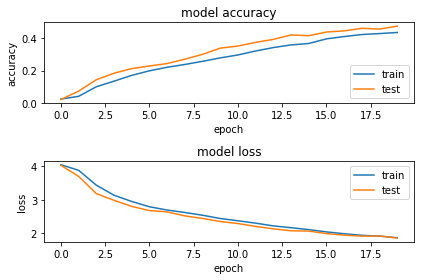

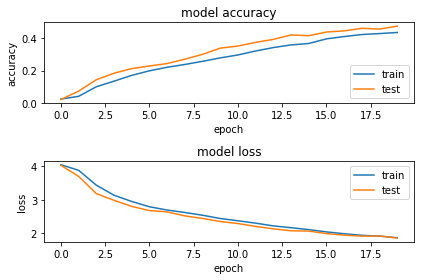

In [14]:
history = model.fit(X_train, Y_train,
          batch_size=128, epochs=20,
          verbose=2,
          validation_data=(X_test, Y_test))

# saving the model
save_dir = "/home/uttam/PycharmProjects/ML"
model_name = 'model.h5'
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig

In [15]:
prediction = model.predict_classes(X_test[888:889])

In [16]:
prediction

array([8])

In [17]:
scipy.misc.imsave("predict1.png",X_test[888,:].reshape(-1,36))

/home/uttam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  """Entry point for launching an IPython kernel.
